In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_processed = pd.read_csv('../data/processed/passengers_casatramway_processed.csv')
preprocessor = joblib.load('../saved_models/preprocessor.pkl')

In [3]:
target_column = 'Nb_Passagers'
X = df_processed.drop(columns=[target_column])
y = df_processed[target_column]

In [4]:
split_ratio = 0.8
split_index = int(len(df_processed) * split_ratio)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [5]:
print("\n--- Régression Linéaire ---")
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"RMSE (LR) : {rmse_lr:.2f}")
print(f"MAE (LR) : {mae_lr:.2f}")
print(f"R2 Score (LR) : {r2_lr:.2f}")
joblib.dump(model_lr, '../saved_models/linear_regression_model.pkl')
print("Modèle LinearRegression sauvegardé.")


--- Régression Linéaire ---
RMSE (LR) : 5001.67
MAE (LR) : 4010.51
R2 Score (LR) : 0.89
Modèle LinearRegression sauvegardé.


In [6]:
print("\n--- Random Forest ---")
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 utilise tous les cœurs
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE (RF) : {rmse_rf:.2f}")
print(f"MAE (RF) : {mae_rf:.2f}")
print(f"R2 Score (RF) : {r2_rf:.2f}")
joblib.dump(model_rf, '../saved_models/random_forest_model.pkl')
print("Modèle RandomForestRegressor sauvegardé.")


--- Random Forest ---
RMSE (RF) : 5022.85
MAE (RF) : 4048.33
R2 Score (RF) : 0.89
Modèle RandomForestRegressor sauvegardé.


In [7]:
# --- 6. Entraînement et Évaluation d'XGBoost ---
print("\n--- XGBoost ---")
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE (XGB) : {rmse_xgb:.2f}")
print(f"MAE (XGB) : {mae_xgb:.2f}")
print(f"R2 Score (XGB) : {r2_xgb:.2f}")
joblib.dump(model_xgb, '../saved_models/xgboost_model.pkl')
print("Modèle XGBoost sauvegardé.")



--- XGBoost ---
RMSE (XGB) : 5473.35
MAE (XGB) : 4228.52
R2 Score (XGB) : 0.87
Modèle XGBoost sauvegardé.


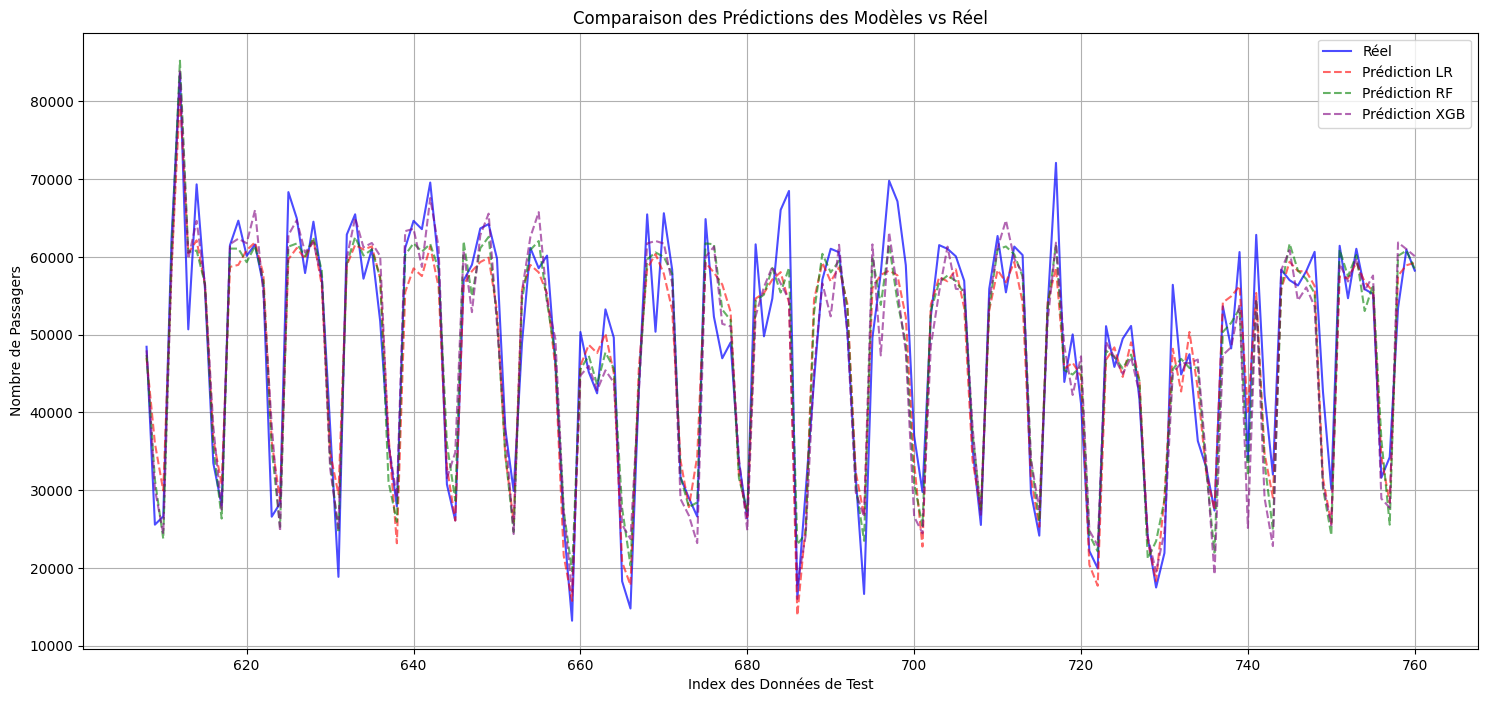

In [8]:
# --- 7. Comparaison Visuelle des Prédictions ---
plt.figure(figsize=(18, 8))
plt.plot(y_test.index, y_test, label='Réel', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred_lr, label='Prédiction LR', color='red', linestyle='--', alpha=0.6)
plt.plot(y_test.index, y_pred_rf, label='Prédiction RF', color='green', linestyle='--', alpha=0.6)
plt.plot(y_test.index, y_pred_xgb, label='Prédiction XGB', color='purple', linestyle='--', alpha=0.6)
plt.title('Comparaison des Prédictions des Modèles vs Réel')
plt.xlabel('Index des Données de Test')
plt.ylabel('Nombre de Passagers')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# --- 8. Résumé des Performances ---
performance_summary = pd.DataFrame({
    'Modèle': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'R2 Score': [r2_lr, r2_rf, r2_xgb]
})
print("\n--- Résumé des Performances des Modèles ---")
print(performance_summary.set_index('Modèle'))


--- Résumé des Performances des Modèles ---
                          RMSE          MAE  R2 Score
Modèle                                               
Linear Regression  5001.668039  4010.509180  0.892810
Random Forest      5022.845331  4048.329150  0.891901
XGBoost            5473.352527  4228.523706  0.871640
